In [1]:
#Installing the necessary packages

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [2]:
#Importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset

df = pd.read_csv('all-menu.csv')

In [4]:
#Showing top 5 entries

df.head(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [5]:
#Showing bottom 5 entries

df.tail(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0


In [6]:
#Checking the datatype of each column

df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [7]:
#Finding missing values

df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [8]:
#Handling missing values

df = df.fillna('0')
df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

In [11]:
df = df.replace('3 2', '3.2')
df = df.replace('Varies', 'NaN')
df = df.replace('varies', 'Nan')
for i in np.where(df['Caffeine (mg)'] == 'NaN'):
    df = df.drop(i)


In [12]:
#String manipulation and data conversion

skip_arr = ['Beverage_category', 'Beverage', 'Beverage_prep']

for col in df.columns:
    if col in skip_arr:
        continue
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('%', '')
        df[col] = df[col].astype(float)
    else:
        df[col] = df[col].astype(float)

In [13]:
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                     float64
 Total Fat (g)               float64
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                 float64
 Total Carbohydrates (g)     float64
Cholesterol (mg)             float64
 Dietary Fibre (g)           float64
 Sugars (g)                  float64
 Protein (g)                 float64
Vitamin A (% DV)             float64
Vitamin C (% DV)             float64
 Calcium (% DV)              float64
Iron (% DV)                  float64
Caffeine (mg)                float64
dtype: object

Text(0, 0.5, 'Sugar')

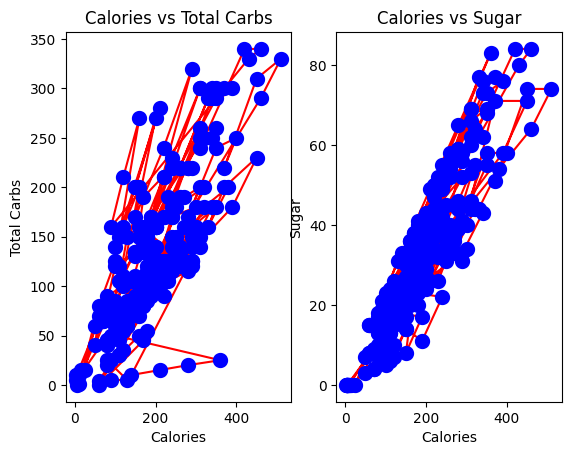

In [28]:
#Line chart

plt.subplot(1,2,1)
plt.plot(df['Calories'], df[' Total Carbohydrates (g) '], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Calories vs Total Carbs')
plt.xlabel('Calories')
plt.ylabel('Total Carbs')

plt.subplot(1,2,2)
plt.plot(df['Calories'], df[' Sugars (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Calories vs Sugar')
plt.xlabel('Calories')
plt.ylabel('Sugar')

Text(0, 0.5, 'Total Fat')

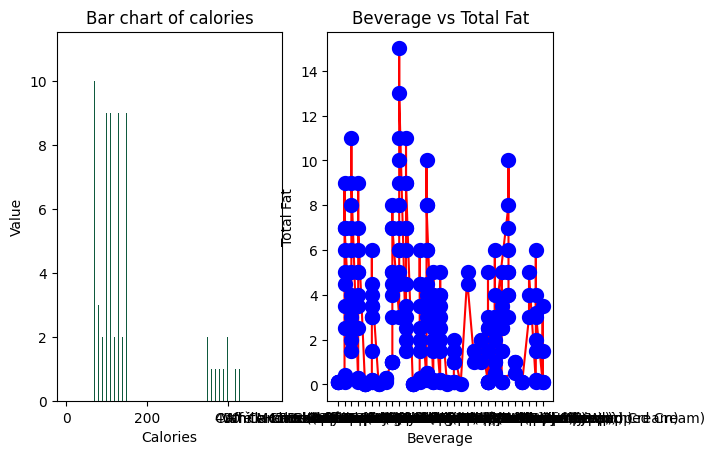

In [35]:
#Bar chart

plt.subplot(1, 2, 1)
plt.bar(x=df['Calories'].unique(), height=df['Calories'].value_counts().to_list(), color='#0f5a3e')
plt.xlabel('Calories')
plt.ylabel('Value')
plt.title('Bar chart of calories')

plt.subplot(1,2,2)
plt.plot(df['Beverage'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Beverage vs Total Fat')
plt.xlabel('Beverage')
plt.ylabel('Total Fat')


Text(0, 0.5, 'Sugar')

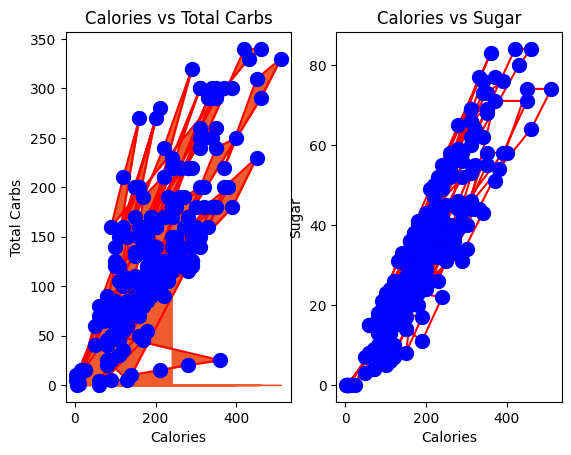

In [30]:
#Area Chart

plt.subplot(1,2,1)
plt.plot(df['Calories'], df[' Total Carbohydrates (g) '], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Calories vs Total Carbs')
plt.xlabel('Calories')
plt.ylabel('Total Carbs')
plt.fill_between(df['Calories'], df[' Total Carbohydrates (g) '], color='#ef5b2c')

plt.subplot(1,2,2)
plt.plot(df['Calories'], df[' Sugars (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Calories vs Sugar')
plt.xlabel('Calories')
plt.ylabel('Sugar')

/tmp/ipykernel_1603/3435266611.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'Total Fat')

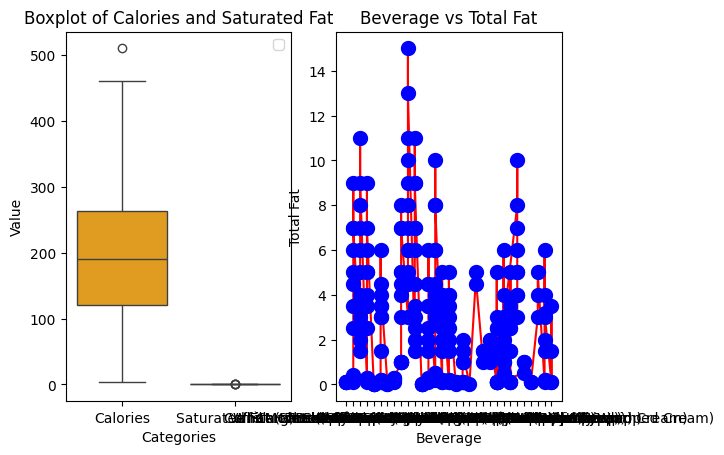

In [36]:
#Boxplot

plt.subplot(1,2,1)
sns.boxplot(data=df[['Calories', 'Saturated Fat (g)']], color='orange')
plt.xlabel('Categories')
plt.ylabel('Value')
plt.title('Boxplot of Calories and Saturated Fat')

plt.subplot(1,2,2)
plt.plot(df['Beverage'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Beverage vs Total Fat')
plt.xlabel('Beverage')
plt.ylabel('Total Fat')

Text(0, 0.5, 'Total Fat')

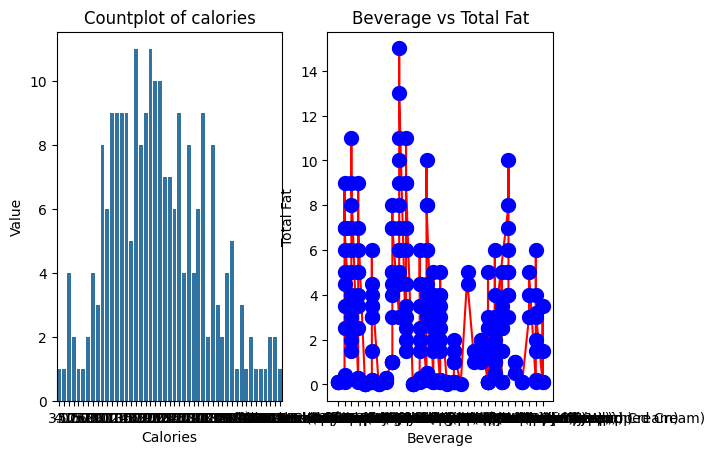

In [39]:
#Countplot

plt.subplot(1,2,1)
sns.countplot(x='Calories', data=df.reset_index())
plt.xlabel('Calories')
plt.ylabel('Value')
plt.title('Countplot of calories')

plt.subplot(1,2,2)
plt.plot(df['Beverage'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Beverage vs Total Fat')
plt.xlabel('Beverage')
plt.ylabel('Total Fat')

Text(0, 0.5, 'Total Fat')

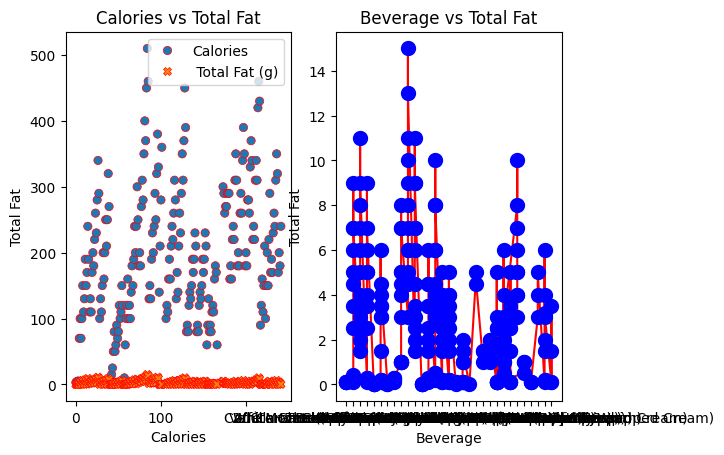

In [41]:
#Scatterplot

plt.subplot(1,2,1)
sns.scatterplot(df[['Calories', ' Total Fat (g)']], edgecolor='red')
plt.title('Calories vs Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat')

plt.subplot(1,2,2)
plt.plot(df['Beverage'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Beverage vs Total Fat')
plt.xlabel('Beverage')
plt.ylabel('Total Fat')

/tmp/ipykernel_1603/3192318652.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'Total Fat')

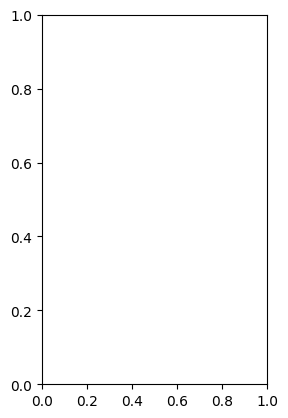

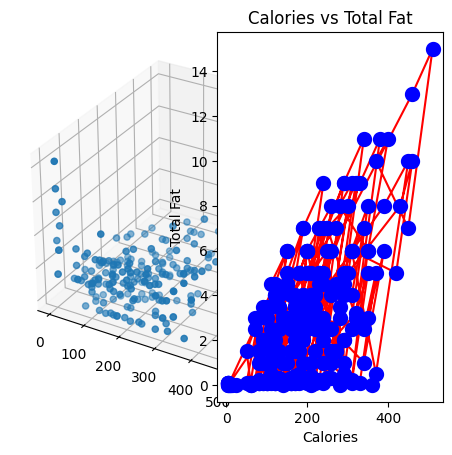

In [45]:
#3D scatterplot

from mpl_toolkits.mplot3d import Axes3D

plt.subplot(1,2,1)
data = df[['Calories', ' Total Fat (g)', 'Caffeine (mg)']]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Calories'], df[' Total Fat (g)'],df['Caffeine (mg)'])

plt.subplot(1,2,2)
plt.plot(df['Calories'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Calories vs Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat')

In [46]:
%pip install nbformat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 956.2 kB/s eta 0:00:000:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 241.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.8 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Total Fat')

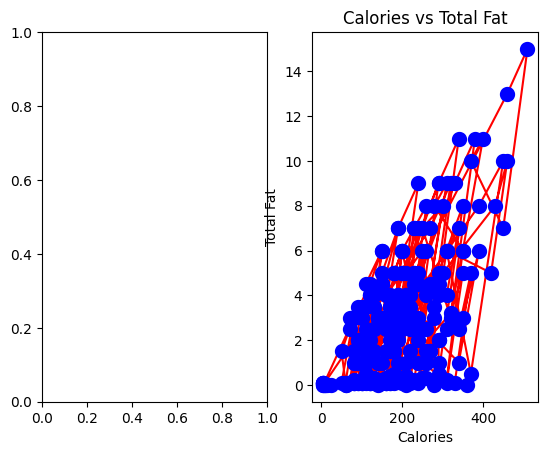

In [75]:
# Interactive 3D Scatterplot
import plotly.express as px

plt.subplot(1,2,1)
fig = px.scatter_3d(data, x='Calories', y=' Total Fat (g)', z='Caffeine (mg)', color='Calories')
fig.update_layout(title='Fancy 3D Scatterplot', scene = dict(
                    xaxis_title='Calories',
                    yaxis_title='Total fat',
                    zaxis_title='Caffeine'))
fig.show()

plt.subplot(1,2,2)
plt.plot(df['Calories'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Calories vs Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat')

Text(0, 0.5, 'Total Fat')

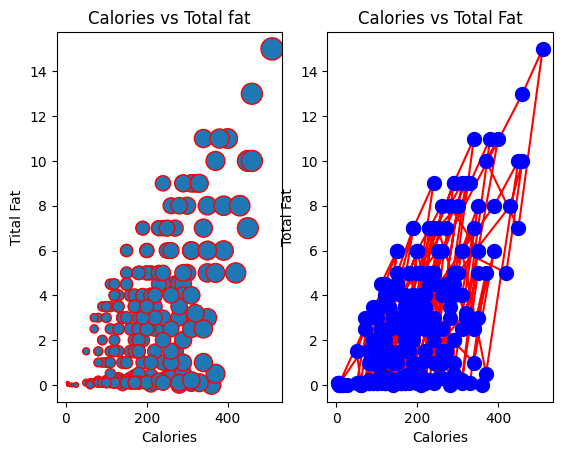

In [62]:
#Bubble plot

plt.subplot(1,2,1)
plt.scatter(df['Calories'], df[' Total Fat (g)'], s=df['Calories']*0.5, edgecolor='red')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title('Calories vs Total fat')

plt.subplot(1,2,2)
plt.plot(df['Calories'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Calories vs Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat')

Text(0, 0.5, 'Total Fat')

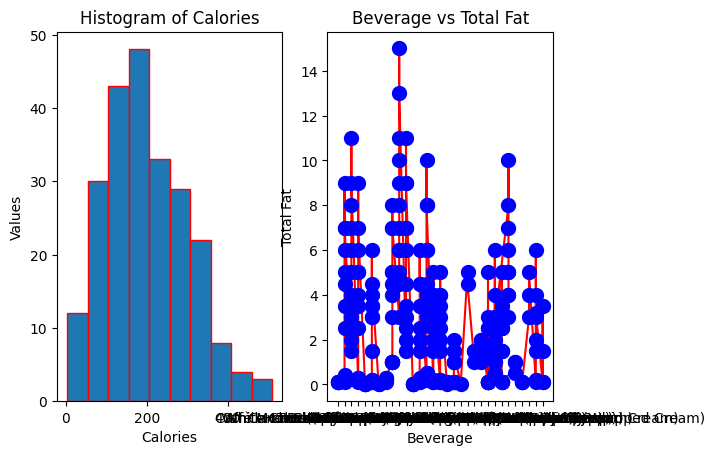

In [61]:
#Histogram

plt.subplot(1,2,1)
plt.hist(df['Calories'], bins=10, edgecolor='red')
plt.xlabel('Calories')
plt.ylabel('Values')
plt.title('Histogram of Calories')

plt.subplot(1,2,2)
plt.plot(df['Beverage'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Beverage vs Total Fat')
plt.xlabel('Beverage')
plt.ylabel('Total Fat')

Text(0, 0.5, 'Total Fat')

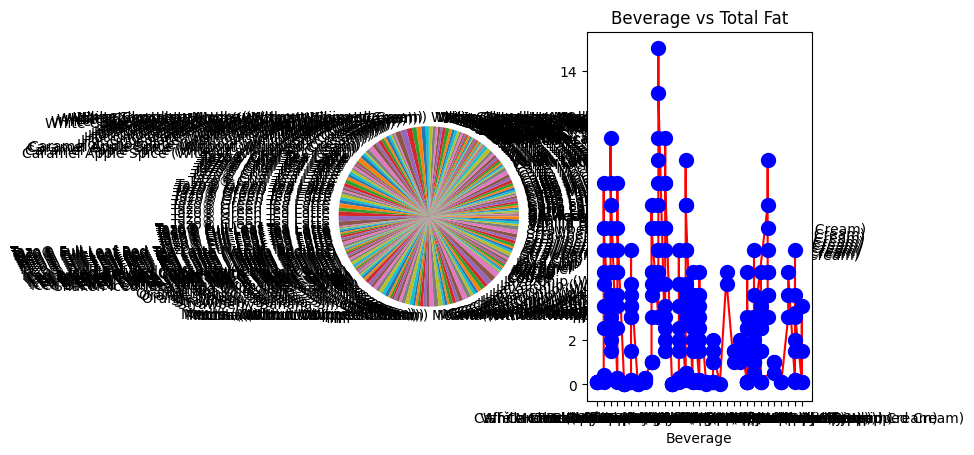

In [57]:
#Pie chart

plt.subplot(1,2,1)
plt.pie(df['Calories'], labels=df['Beverage'])

plt.subplot(1,2,2)
plt.plot(df['Beverage'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Beverage vs Total Fat')
plt.xlabel('Beverage')
plt.ylabel('Total Fat')

Text(0, 0.5, 'Total Fat')

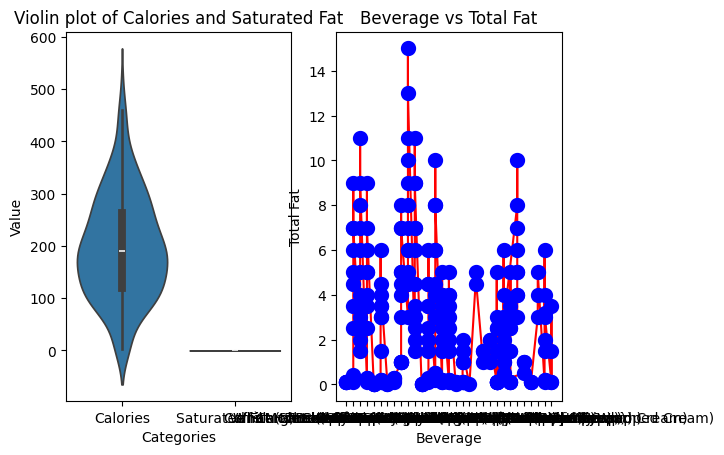

In [60]:
#Violin

plt.subplot(1,2,1)
sns.violinplot(data=df[['Calories', 'Saturated Fat (g)']])
plt.xlabel('Categories')
plt.ylabel('Value')
plt.title('Violin plot of Calories and Saturated Fat')

plt.subplot(1,2,2)
plt.plot(df['Beverage'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Beverage vs Total Fat')
plt.xlabel('Beverage')
plt.ylabel('Total Fat')

Text(0, 0.5, 'Total Fat')

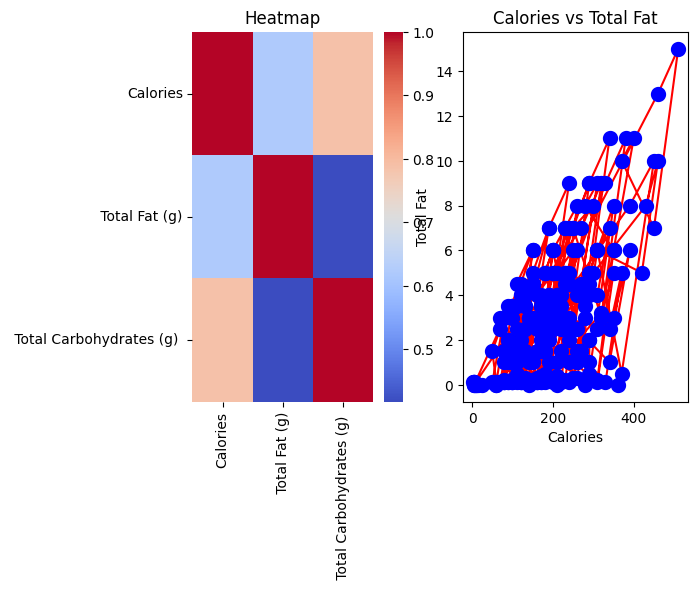

In [67]:
#Heatmap

plt.subplot(1,2,1)
crr_ = df[['Calories', ' Total Fat (g)', ' Total Carbohydrates (g) ']].corr()
sns.heatmap(crr_, cmap = 'coolwarm')
plt.title('Heatmap')

plt.subplot(1,2,2)
plt.plot(df['Calories'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Calories vs Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat')

Text(0, 0.5, 'Total Fat')

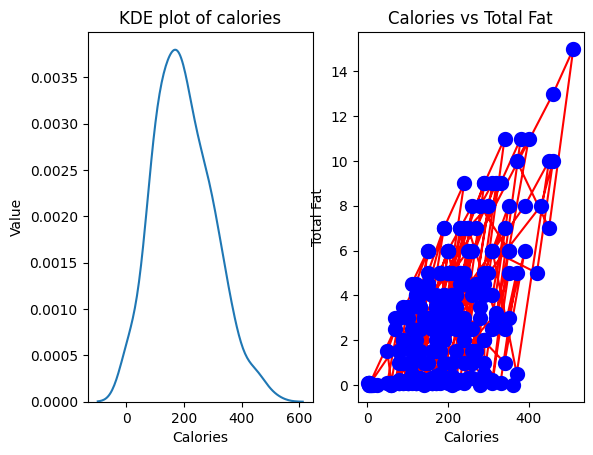

In [70]:
#KDE plot

plt.subplot(1,2,1)
sns.kdeplot(df['Calories'])
plt.xlabel('Calories')
plt.ylabel('Value')
plt.title('KDE plot of calories')

plt.subplot(1,2,2)
plt.plot(df['Calories'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Calories vs Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat')

/tmp/ipykernel_1603/221545927.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0, 0.5, 'Total Fat')

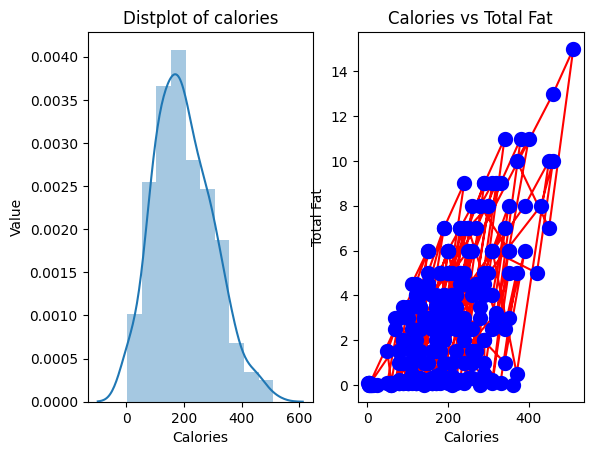

In [71]:
#Distplot

plt.subplot(1,2,1)
sns.distplot(df['Calories'], bins=10, kde=True)
plt.xlabel('Calories')
plt.ylabel('Value')
plt.title('Distplot of calories')

plt.subplot(1,2,2)
plt.plot(df['Calories'], df[' Total Fat (g)'], marker='o', color='red', markeredgewidth='5.0', markeredgecolor='blue', markerfacecolor='blue')
plt.title('Calories vs Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat')

In [72]:
# Word Cloud
%pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 3.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


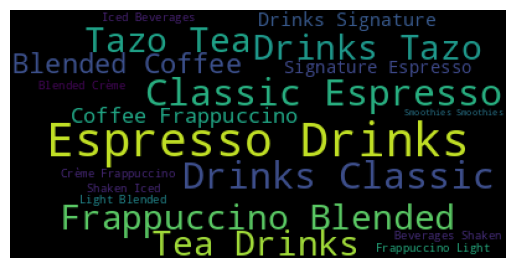

In [73]:
words = np.array(df['Beverage_category'].values)
all_words = '. '.join(words)

from wordcloud import WordCloud

wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()